In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
os.chdir('C:\\Users\\marty\\Desktop\\assignment')
os.getcwd()

'C:\\Users\\marty\\Desktop\\assignment'

In [4]:
df = pd.read_csv('trans.csv', sep=";")

In [5]:
df.head()

,data,categoria,amount
0,04/01/2022,INCASSO FATTURA,5000.0
1,13/01/2022,INCASSO FATTURA,4800.0
2,15/01/2022,STIPENDI,-6000.0
3,15/01/2022,RIMBORSO FINANZIAMENTO,-1200.0
4,22/01/2022,INCASSO FATTURA,5400.0


In [6]:
df.shape

(115, 3)

In [7]:
df.columns

Index(['data', 'categoria', 'amount'], dtype='object')

In [8]:
from datetime import datetime

In [9]:
df['data'] = pd.to_datetime(df['data'], format="%d/%m/%Y")

In [10]:
df['data']

0     2022-01-04
1     2022-01-13
2     2022-01-15
3     2022-01-15
4     2022-01-22
         ...    
110   2022-12-15
111   2022-12-21
112   2022-12-21
113   2022-12-30
114   2022-12-30
Name: data, Length: 115, dtype: datetime64[ns]

In [11]:
#consideriamo solo il mese
df["mese"] = df["data"].dt.month

In [12]:
df['mese']

0       1
1       1
2       1
3       1
4       1
       ..
110    12
111    12
112    12
113    12
114    12
Name: mese, Length: 115, dtype: int64

In [13]:
#creare la nuova variabile trimestre
mesi = [1,2,3,4,5,6,7,8,9,10,11,12]
trimestre = ["Trim1", "Trim1", "Trim1", "Trim2", "Trim2", "Trim2", "Trim3", "Trim3", "Trim3", "Trim4", "Trim4", "Trim4"]

In [14]:
#nuova colonna
df['Trimestre'] = df['mese'].replace(mesi, trimestre)

In [15]:
#to check
df.head()

,data,categoria,amount,mese,Trimestre
0,2022-01-04,INCASSO FATTURA,5000.0,1,Trim1
1,2022-01-13,INCASSO FATTURA,4800.0,1,Trim1
2,2022-01-15,STIPENDI,-6000.0,1,Trim1
3,2022-01-15,RIMBORSO FINANZIAMENTO,-1200.0,1,Trim1
4,2022-01-22,INCASSO FATTURA,5400.0,1,Trim1


In [16]:
#transazioni bancarie entrate meno uscite
df['amount'].sum()

7525.139999999996

In [17]:
#salvare
trans_annuale = 7525.14

In [18]:
trans_annuale
#a livello complessivo (all'interno dell'anno), le transazioni generano una chiusura positiva, ma ocn 10000 euro di finanziamento, quindi non della società

7525.14

In [21]:
#transazioni divise per mese
trans_mensile = df.groupby('mese')['amount'].sum()

In [22]:
trans_mensile


mese
1      8666.00
2     -2839.82
3     -2504.14
4     -2061.95
5     10622.23
6     -3510.55
7      -489.32
8     -2501.99
9     -2055.44
10     1479.83
11    -1010.39
12     3730.68
Name: amount, dtype: float64

In [23]:
# La cassa generata a gennaio risulta coprire per i tre mesi in perdita. Dopo un trend negativo, maggio risulta fortemente positivo, ma è dato da un finanziamento esterno di 10000 euro.
# Giugno luglio e agosto sono ancora negativi, e se non ci fosse stato il finanziamento la società non sarebbe in grado di coprire le perdite.
# Ottobre positivo, novembre torna negativo, ma dicembre ancora positivo.

In [24]:
trans_trim = df.groupby('Trimestre')['amount'].sum()

In [25]:
trans_trim
 


Trimestre
Trim1    3322.04
Trim2    5049.73
Trim3   -5046.75
Trim4    4200.12
Name: amount, dtype: float64

In [ ]:
#guardando ai trimestri, presentano un trend in crescita nei primi due, mentre il terzo è un trimestre in negativo.
#tuttavia, le uscite sono coperte dalla liquidità generata dai due trimestri precedenti.
#anche in questo caso, però, nel secondo trimestre bisogna ricordare che ci sono stati 10000 euro di finanziamento ricevuti
#inoltre, nel quarto trimestre, le entrate tornano a superare le uscite.

In [26]:
#graficamente:

In [27]:
# x-coordinates of bars 
base = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [28]:
# labels for bars
tick_label = ['gennaio', 'febbraio', 'marzo', 'aprile', 'maggio', 'giugno', 'luglio', 'agosto', 'settembre', 'ottobre', 'novembre', 'dicembre']

In [29]:
#Visualizzazione: grafico

# x-coordinates of left sides of bars 
base = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
  
# labels for bars
tick_label = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto',
             'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
#Color
color = ['green', 'red', 'red', 'red', 'green', 'red', 'red', 'red', 'red', 'green', 'red', 'green']

In [30]:
import seaborn as sns

C:\Users\marty\AppData\Local\Temp\ipykernel_4236\3891897168.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',
C:\Users\marty\AppData\Local\Temp\ipykernel_4236\3891897168.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


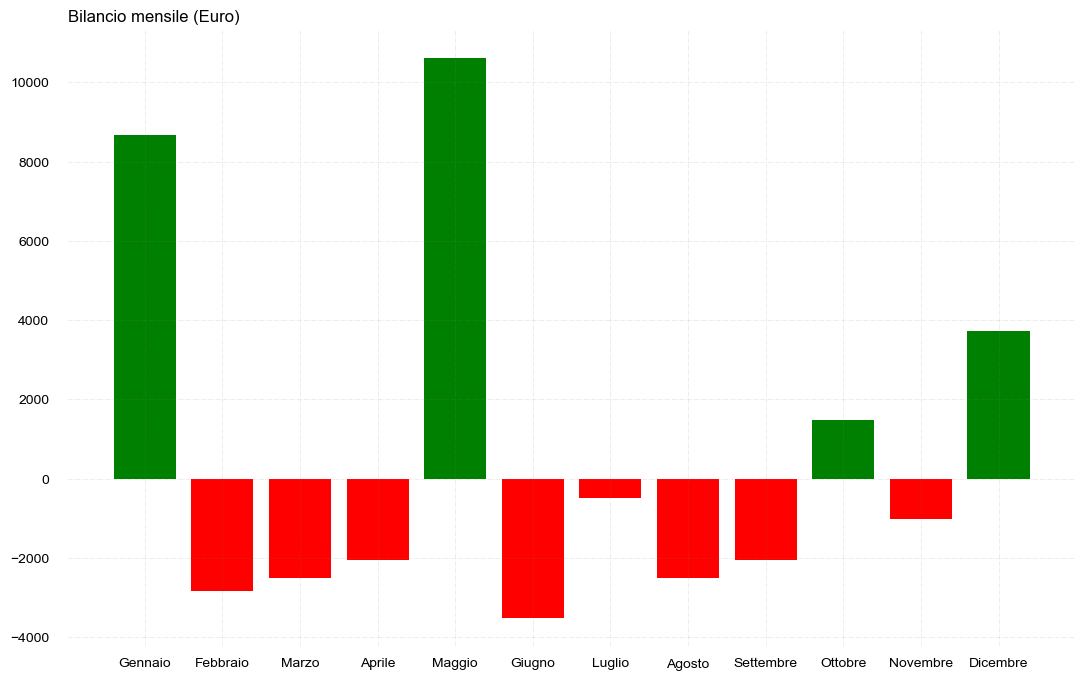

In [31]:
# plotting a bar chart
# Figure Size
fig, ax = plt.subplots(figsize =(13, 8))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.bar(base, trans_mensile, tick_label = tick_label,
        width = 0.8, color = color) 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 

 # Add x, y gridlines
sns.set_style("whitegrid")
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# Add Plot Title
ax.set_title('Bilancio mensile (Euro)',
             loc ='left', )
# Show Plot
plt.show()

In [32]:
#anche se in maggioranza numerica i mesi in negativo rispetto a quelli in positivo,i mesi in negativo
#tendono ad avere una perdita contenuta, se comparata alla liquidità nei mesi in positivo. 
#Come abbiamo però detto in precedenza, a maggio l'attività riceve 10000 euro da un'erogazione di finanziamento.

In [33]:
#bilancio trimestrale 
categories = ["Primo Trimestre", "Secondo Trimestre", "Terzo Trimestre", "Quarto Trimestre"]
counts = [3322, 5049, -5046, 4200]
trim = pd.DataFrame(list(zip(categories, counts)), columns =['categories', 'counts'])

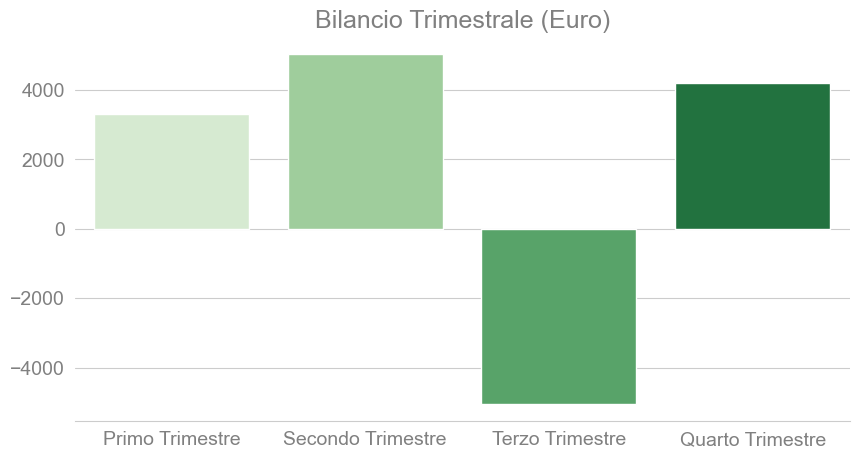

In [34]:
#Visualizzazione bilancio trimestrale

fig, ax = plt.subplots(figsize =(10, 5))

# Show Plot 
 # Add x, y gridlines
sns.set_style("whitegrid")
sns.barplot(x="categories", y="counts", palette='Greens', data=trim)
plt.xlabel('')
plt.ylabel('')
plt.title('Bilancio Trimestrale (Euro)', size=18, color='grey')
plt.xticks(size=14, color='grey')
plt.yticks(size=14, color='grey')
sns.despine(left=True)

In [35]:
#analizziamo ora solo le spese

C:\Users\marty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


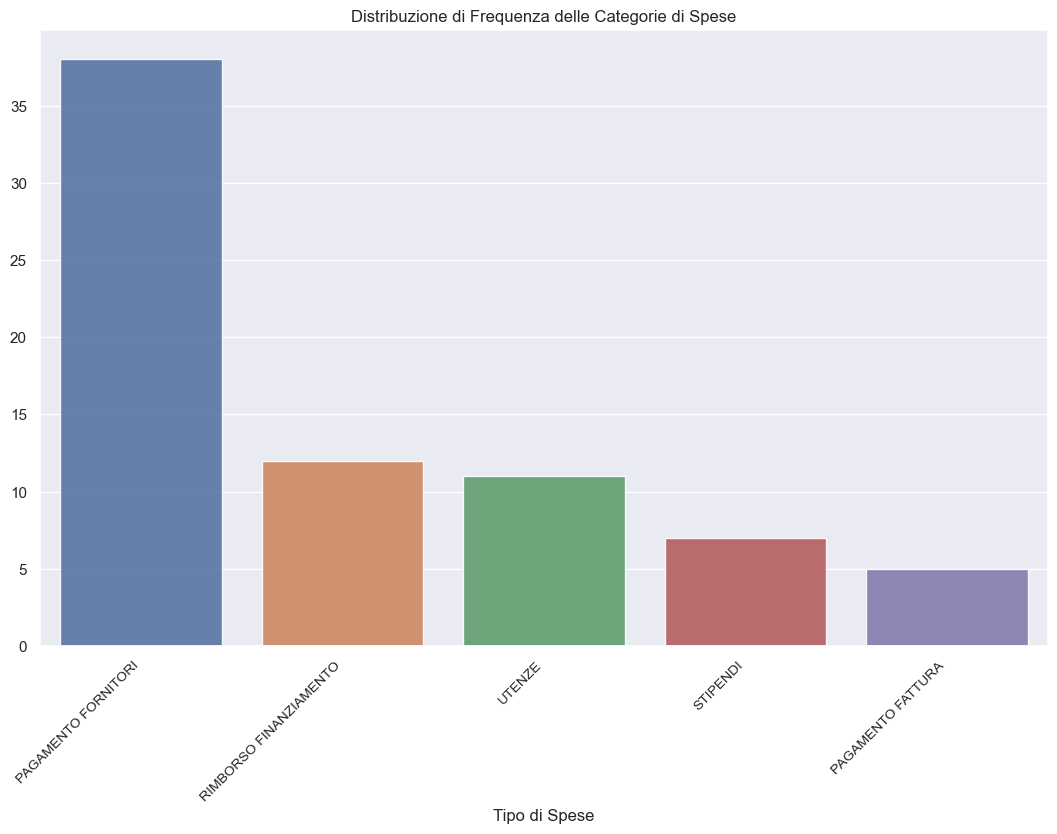

In [36]:
# prendo solo i valori minori di 0
rows = df[df['amount'] < 0]

spesa = rows['categoria'].value_counts()
spesa
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize =(13, 8))
sns.barplot(spesa.index, spesa.values, alpha=0.9, data=df)
plt.xticks(rotation = 45, ha="right", size=10)
plt.title('Distribuzione di Frequenza delle Categorie di Spese')
plt.ylabel('')
plt.xlabel('Tipo di Spese', fontsize=12)
plt.show()



In [37]:
#come si può notare, il pagamento dei fornitori è la maggiore categorie di spesa. Guardando meglio, con le percentuali:

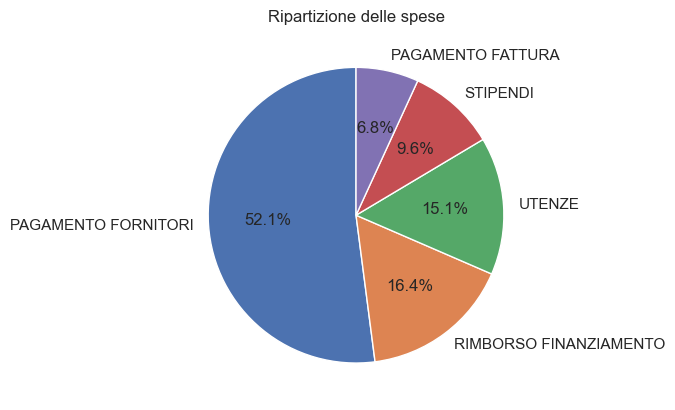

In [38]:
#grafico a torta
labels = ['PAGAMENTO FORNITORI', 'RIMBORSO FINANZIAMENTO','UTENZE', 'STIPENDI', 'PAGAMENTO FATTURA']
sizes = spesa

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title to the plot
plt.title("Ripartizione delle spese")

# Show the plot
plt.show()

In [35]:
# Dal grafico a torta con percentuali, si può notare ancora meglio la ripartizione di queste categorie di spesa. 
#Il pagamento dei fornitori copre la metà delle spese dell'azienda.

In [140]:
#vediamo ora come le entrate sono relazionate alle spese nei diversi trimestri.


In [40]:
#percentuale
count_trim = df.groupby('Trimestre')['categoria'].value_counts(normalize=True)
count_trim_perc = count_trim * 100
count_trim_perc

Trimestre  categoria               
Trim1      INCASSO FATTURA             38.461538
           PAGAMENTO FORNITORI         26.923077
           RIMBORSO FINANZIAMENTO      11.538462
           STIPENDI                    11.538462
           UTENZE                      11.538462
Trim2      INCASSO FATTURA             33.333333
           PAGAMENTO FORNITORI         33.333333
           RIMBORSO FINANZIAMENTO      10.000000
           STIPENDI                    10.000000
           UTENZE                      10.000000
           EROGAZIONE FINANZIAMENTO     3.333333
Trim3      INCASSO FATTURA             34.482759
           PAGAMENTO FORNITORI         34.482759
           RIMBORSO FINANZIAMENTO      10.344828
           UTENZE                      10.344828
           PAGAMENTO FATTURA            6.896552
           STIPENDI                     3.448276
Trim4      INCASSO FATTURA             36.666667
           PAGAMENTO FORNITORI         36.666667
           PAGAMENTO FATTURA     

In [41]:
cat_trim = [[1, 2, 3, 4], [38.5, 33.3, 34.5, 36.7], [27, 33.3, 34.5, 36.7], [11.5, 10, 10.3, 10], [11.5, 10, 3.4, 0], [11.5, 10, 10.3, 7], [0, 3.3, 0, 0], [0, 0, 7, 10]]
etichette = ['Pagamento fornitori', 'Rimborso Finanziamento', 'Stipendi', 'Utenze', 'Erogazione Finanziamento', 'Pagamento Fattura']

In [42]:
g1 = [38.5, 33.3, 34.5, 36.7]
g2 = [27, 33.3, 34.5, 36.7]
g3 = [11.5, 10, 10.3, 10]
g4 = [11.5, 10, 3.4, 0]
g5 = [11.5, 10, 10.3, 7]
g6 = [0, 3.3, 0, 0]
g7 = [0, 0, 7, 10]
# Combine the data into one array
cat_trim = np.array([g1, g2, g3, g4, g5, g6, g7])

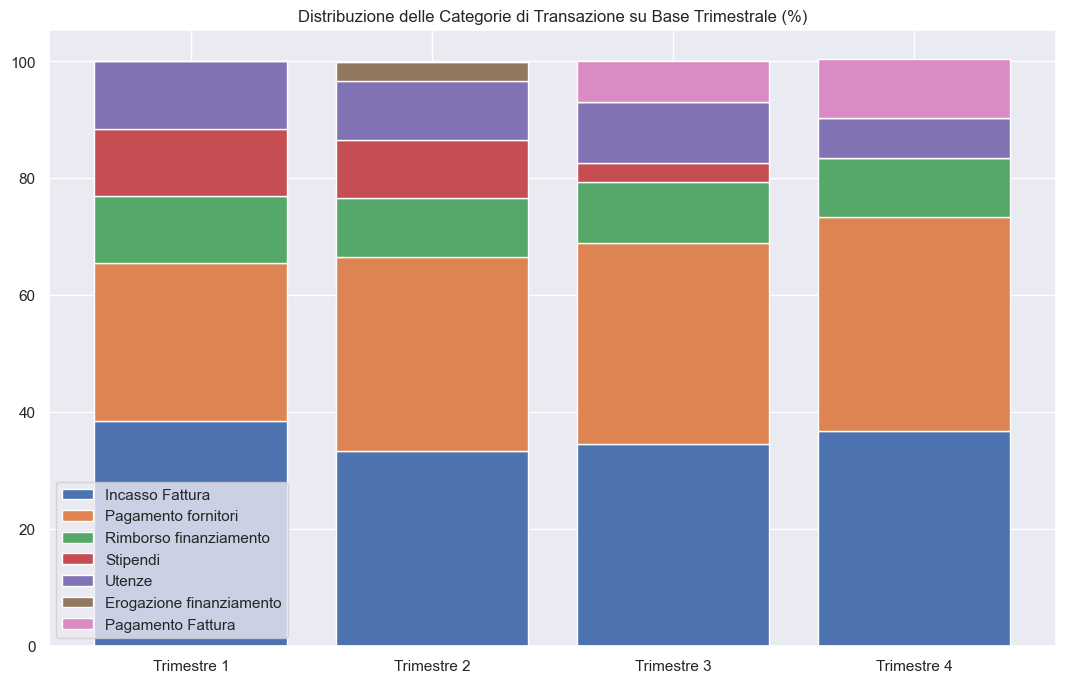

In [43]:
# Plot the data as a stacked bar plot
# Generate data for the bar plot
fig, ax = plt.subplots(figsize =(13, 8))
ax.bar(np.arange(4), cat_trim[0,:], label = 'Incasso Fattura')
ax.bar(np.arange(4), cat_trim[1,:], bottom=cat_trim[0,:], label = 'Pagamento fornitori')
ax.bar(np.arange(4), cat_trim[2,:], bottom=cat_trim[0,:] + cat_trim[1, :], label = 'Rimborso finanziamento')
ax.bar(np.arange(4), cat_trim[3,:], bottom=cat_trim[0,:] + cat_trim[1, :] + cat_trim[2, :], label = 'Stipendi')
ax.bar(np.arange(4), cat_trim[4,:], bottom=cat_trim[0,:] + cat_trim[1, :] + cat_trim[2, :] + cat_trim[3, :], label = 'Utenze')
ax.bar(np.arange(4), cat_trim[5,:], bottom=cat_trim[0,:] + cat_trim[1, :] + cat_trim[2, :] + cat_trim[3, :] + + cat_trim[4, :], label = 'Erogazione finanziamento')
ax.bar(np.arange(4), cat_trim[6,:], bottom=cat_trim[0,:] + cat_trim[1, :] + cat_trim[2, :] + cat_trim[3, :] + + cat_trim[4, :] + cat_trim[5, :], label = 'Pagamento Fattura')

# Add labels, title, and legend
ax.set_xticks(np.arange(4))
ax.set_xticklabels(['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4'])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Distribuzione delle Categorie di Transazione su Base Trimestrale (%)')
ax.legend()

# Show the plot
plt.show()

In [44]:
# Da questo grafico, si può vedere come
#l'incasso fattura sia stabile durante i trimestri, se comparato al totale delle spese che l'azienda sosiene nei trimestri

In [45]:
#guardando ora solo la ripartizione delle spese

In [46]:
count_trim = df.groupby('Trimestre')['categoria'].value_counts()
count_trim

Trimestre  categoria               
Trim1      INCASSO FATTURA             10
           PAGAMENTO FORNITORI          7
           RIMBORSO FINANZIAMENTO       3
           STIPENDI                     3
           UTENZE                       3
Trim2      INCASSO FATTURA             10
           PAGAMENTO FORNITORI         10
           RIMBORSO FINANZIAMENTO       3
           STIPENDI                     3
           UTENZE                       3
           EROGAZIONE FINANZIAMENTO     1
Trim3      INCASSO FATTURA             10
           PAGAMENTO FORNITORI         10
           RIMBORSO FINANZIAMENTO       3
           UTENZE                       3
           PAGAMENTO FATTURA            2
           STIPENDI                     1
Trim4      INCASSO FATTURA             11
           PAGAMENTO FORNITORI         11
           PAGAMENTO FATTURA            3
           RIMBORSO FINANZIAMENTO       3
           UTENZE                       2
Name: categoria, dtype: int64

In [47]:
spese_trim = df[df['amount'] < 0].groupby('Trimestre')['categoria'].value_counts(normalize=True)
spese_trim_perc = spese_trim * 100
spese_trim_perc

Trimestre  categoria             
Trim1      PAGAMENTO FORNITORI       43.750000
           RIMBORSO FINANZIAMENTO    18.750000
           STIPENDI                  18.750000
           UTENZE                    18.750000
Trim2      PAGAMENTO FORNITORI       52.631579
           RIMBORSO FINANZIAMENTO    15.789474
           STIPENDI                  15.789474
           UTENZE                    15.789474
Trim3      PAGAMENTO FORNITORI       52.631579
           RIMBORSO FINANZIAMENTO    15.789474
           UTENZE                    15.789474
           PAGAMENTO FATTURA         10.526316
           STIPENDI                   5.263158
Trim4      PAGAMENTO FORNITORI       57.894737
           PAGAMENTO FATTURA         15.789474
           RIMBORSO FINANZIAMENTO    15.789474
           UTENZE                    10.526316
Name: categoria, dtype: float64

In [48]:
cat_trim = [[1, 2, 3, 4, 5], [43.7, 52.6, 52.6, 57.9], [18.8, 15.8, 15.8, 15.8], [18.6, 15.8, 5.3, 0], [18.6, 15.8, 15.8, 10.5], [0, 0, 10.5, 15.8]]
etichette = ['Pagamento fornitori', 'Rimborso Finanziamento', 'Stipendi', 'Utenze', 'Pagamento Fattura']

In [49]:
g1 = [43.7, 52.6, 52.6, 57.9]
g2 = [18.8, 15.8, 15.8, 15.8]
g3 = [18.6, 15.8, 5.3, 0]
g4 = [18.6, 15.8, 15.8, 10.5]
g5 = [0, 0, 10.5, 15.8]
# Combine the data into one array
spese_trim = np.array([g1, g2, g3, g4, g5])

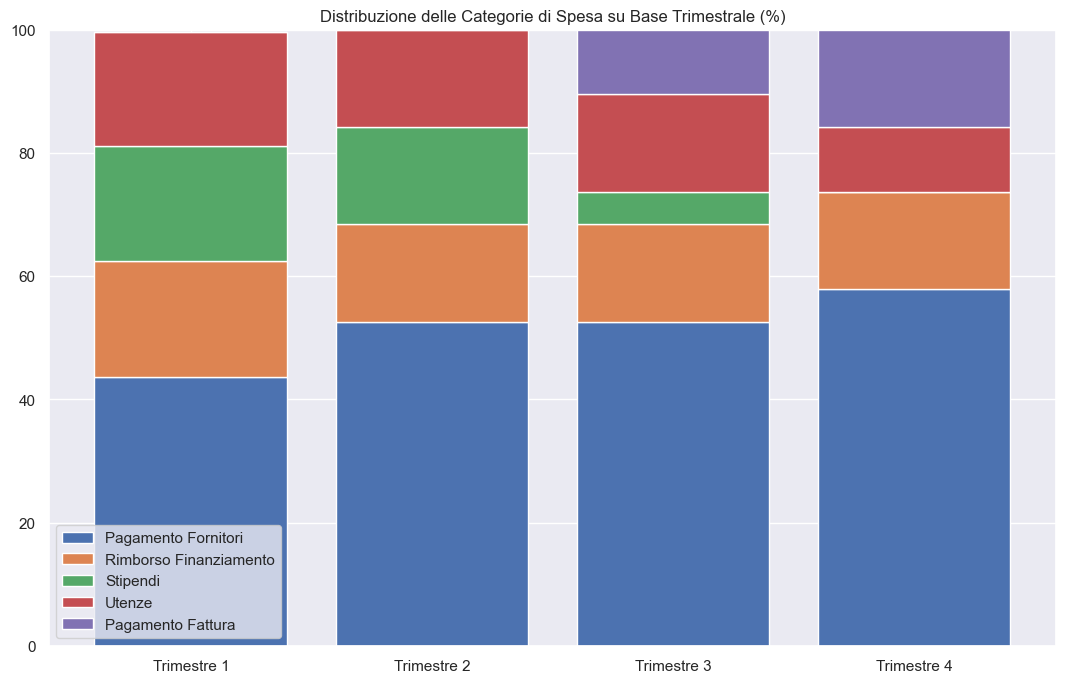

In [50]:
# comparazione tra incassi e spese
fig, ax = plt.subplots(figsize =(13, 8))
ax.bar(np.arange(4), spese_trim[0,:], label = 'Pagamento Fornitori')
ax.bar(np.arange(4), spese_trim[1,:], bottom=spese_trim[0,:], label = 'Rimborso Finanziamento')
ax.bar(np.arange(4), spese_trim[2,:], bottom=spese_trim[0,:] + spese_trim[1, :], label = 'Stipendi')
ax.bar(np.arange(4), spese_trim[3,:], bottom=spese_trim[0,:] + spese_trim[1, :] + spese_trim[2, :], label = 'Utenze')
ax.bar(np.arange(4), spese_trim[4,:], bottom=spese_trim[0,:] + spese_trim[1, :] + spese_trim[2, :] + spese_trim[3, :], label = 'Pagamento Fattura')

# Add labels, title, and legend
ax.set_xticks(np.arange(4))
ax.set_xticklabels(['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4'])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Distribuzione delle Categorie di Spesa su Base Trimestrale (%)')
ax.legend()

# Show the plot
plt.show()

In [ ]:
#in generale, il pagamento dei fornitori ricopre un peso sempre maggiore nei trimestri, mentre le utenze e gli stipendi sempre minore.

In [ ]:
#Per concldere, l'azienda è ricorsa a un finanziamento di 10000 euro, senza questo finanziamento, l'azienda sarebbe stata in perdita di circa 2500 euro.
#Ha dovuto infatti far ricorso a capitali di debito da terze economie per mantenere la gestione della società, in quanto la liquidità generata dall'azienda non le permette di sostenere direttamente le spese.
#Essendo che l'azienda sta richiedendo il terzo finanziamento, si potrebbe chiedere alla 
#società come ha intenzione di utilizzare i soldi richiesti, vedere se sono investiti in progetti profittevoli, 
#che possono portare una relazione alla società, oppure se utilizzata solo per finanziare la liquidità della società.
#In generale, visto che l'ultimo trimestre è positivo, considero l'azienda meritevole di finanziamento.

In [51]:
'nbconvert[webpdf]'

'nbconvert[webpdf]'